In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
from sklearn.metrics import explained_variance_score
import seaborn as sns

## Full figure

In [3]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)
true8_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true8_nona = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true8_diff = np.load("/media/hdd01/sklee/CA1_clust8-30/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)
true12_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true12_nona = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true12_diff = np.load("/media/hdd01/sklee/CA1_clust12-20/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)

one4_nona_hand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_hand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_hand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
one4_nona_rand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/rand/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_rand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/rand/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_rand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/rand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
one4_diff_hand = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
two4_diff_hand = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
gru4_diff_hand = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
one4_diff_rand = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/glm_s10_h1_output.npz")["test"]
two4_diff_rand = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/glm_s10_h2_output.npz")["test"]
gru4_diff_rand = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/gru_s10_h20_output.npz")["test"]

one8_nona_hand = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/glm_s14_h1_output.npz")["test"] + true8_nona_mean
two8_nona_hand = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/glm_s14_h2_output.npz")["test"] + true8_nona_mean
gru8_nona_hand = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/gru_s14_h20_output.npz")["test"] + true8_nona_mean
one8_nona_rand = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/rand/glm_s14_h1_output.npz")["test"] + true8_nona_mean
two8_nona_rand = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/rand/glm_s14_h2_output.npz")["test"] + true8_nona_mean
gru8_nona_rand = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/rand/gru_s14_h20_output.npz")["test"] + true8_nona_mean
one8_diff_hand = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/glm_s14_h1_output.npz")["test"]
two8_diff_hand = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/glm_s14_h2_output.npz")["test"]
gru8_diff_hand = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/gru_s14_h20_output.npz")["test"]
one8_diff_rand = np.load("/media/hdd01/sklee/CA1_clust8-30/rand/glm_s14_h1_output.npz")["test"]
two8_diff_rand = np.load("/media/hdd01/sklee/CA1_clust8-30/rand/glm_s14_h2_output.npz")["test"]
gru8_diff_rand = np.load("/media/hdd01/sklee/CA1_clust8-30/rand/gru_s14_h20_output.npz")["test"]

one12_nona_hand = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/glm_s18_h1_output.npz")["test"] + true12_nona_mean
two12_nona_hand = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/glm_s18_h2_output.npz")["test"] + true12_nona_mean
gru12_nona_hand = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/gru_s18_h20_output.npz")["test"] + true12_nona_mean
one12_nona_rand = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/rand/glm_s18_h1_output.npz")["test"] + true12_nona_mean
two12_nona_rand = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/rand/glm_s18_h2_output.npz")["test"] + true12_nona_mean
gru12_nona_rand = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/rand/gru_s18_h20_output.npz")["test"] + true12_nona_mean
one12_diff_hand = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h1_output.npz")["test"]
two12_diff_hand = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h2_output.npz")["test"]
gru12_diff_hand = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_output.npz")["test"]
one12_diff_rand = np.load("/media/hdd01/sklee/CA1_clust12-20/rand/glm_s18_h1_output.npz")["test"]
two12_diff_rand = np.load("/media/hdd01/sklee/CA1_clust12-20/rand/glm_s18_h2_output.npz")["test"]
gru12_diff_rand = np.load("/media/hdd01/sklee/CA1_clust12-20/rand/gru_s18_h20_output.npz")["test"]

gru4_diff_hand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["E_scale"]
gru4_nona_hand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["E_scale"]

gru4_diff_rand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/gru_s10_h20_output.npz")["E_scale"]
gru4_nona_rand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/rand/gru_s10_h20_output.npz")["E_scale"]

gru4_diff_rand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/gru_s10_h20_output.npz")["E_scale"]
eloc4 = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,1]
eloc4 = eloc4*(-1) + 1

bg_idx = np.arange(2000)
bg_idx = np.delete(bg_idx, np.arange(880,1120))

In [4]:
diff_rand_var_exp = np.zeros((3,3,20))
nona_rand_var_exp = np.zeros((3,3,20))
diff_hand_var_exp = np.zeros((3,3,20))
nona_hand_var_exp = np.zeros((3,3,20))

for i in range(20):
    diff_rand_var_exp[0,0,i] = explained_variance_score(true4_diff[i], one4_diff_rand[i])
    diff_rand_var_exp[0,1,i] = explained_variance_score(true4_diff[i], two4_diff_rand[i])
    diff_rand_var_exp[0,2,i] = explained_variance_score(true4_diff[i], gru4_diff_rand[i])
    nona_rand_var_exp[0,0,i] = explained_variance_score(true4_nona[i], one4_nona_rand[i])
    nona_rand_var_exp[0,1,i] = explained_variance_score(true4_nona[i], two4_nona_rand[i])
    nona_rand_var_exp[0,2,i] = explained_variance_score(true4_nona[i], gru4_nona_rand[i])
    diff_hand_var_exp[0,0,i] = explained_variance_score(true4_diff[i], one4_diff_hand[i])
    diff_hand_var_exp[0,1,i] = explained_variance_score(true4_diff[i], two4_diff_hand[i])
    diff_hand_var_exp[0,2,i] = explained_variance_score(true4_diff[i], gru4_diff_hand[i])
    nona_hand_var_exp[0,0,i] = explained_variance_score(true4_nona[i], one4_nona_hand[i])
    nona_hand_var_exp[0,1,i] = explained_variance_score(true4_nona[i], two4_nona_hand[i])
    nona_hand_var_exp[0,2,i] = explained_variance_score(true4_nona[i], gru4_nona_hand[i])
    
    diff_rand_var_exp[1,0,i] = explained_variance_score(true8_diff[i], one8_diff_rand[i])
    diff_rand_var_exp[1,1,i] = explained_variance_score(true8_diff[i], two8_diff_rand[i])
    diff_rand_var_exp[1,2,i] = explained_variance_score(true8_diff[i], gru8_diff_rand[i])
    nona_rand_var_exp[1,0,i] = explained_variance_score(true8_nona[i], one8_nona_rand[i])
    nona_rand_var_exp[1,1,i] = explained_variance_score(true8_nona[i], two8_nona_rand[i])
    nona_rand_var_exp[1,2,i] = explained_variance_score(true8_nona[i], gru8_nona_rand[i])
    diff_hand_var_exp[1,0,i] = explained_variance_score(true8_diff[i], one8_diff_hand[i])
    diff_hand_var_exp[1,1,i] = explained_variance_score(true8_diff[i], two8_diff_hand[i])
    diff_hand_var_exp[1,2,i] = explained_variance_score(true8_diff[i], gru8_diff_hand[i])
    nona_hand_var_exp[1,0,i] = explained_variance_score(true8_nona[i], one8_nona_hand[i])
    nona_hand_var_exp[1,1,i] = explained_variance_score(true8_nona[i], two8_nona_hand[i])
    nona_hand_var_exp[1,2,i] = explained_variance_score(true8_nona[i], gru8_nona_hand[i])
    
    diff_rand_var_exp[2,0,i] = explained_variance_score(true12_diff[i], one12_diff_rand[i])
    diff_rand_var_exp[2,1,i] = explained_variance_score(true12_diff[i], two12_diff_rand[i])
    diff_rand_var_exp[2,2,i] = explained_variance_score(true12_diff[i], gru12_diff_rand[i])
    nona_rand_var_exp[2,0,i] = explained_variance_score(true12_nona[i], one12_nona_rand[i])
    nona_rand_var_exp[2,1,i] = explained_variance_score(true12_nona[i], two12_nona_rand[i])
    nona_rand_var_exp[2,2,i] = explained_variance_score(true12_nona[i], gru12_nona_rand[i])
    diff_hand_var_exp[2,0,i] = explained_variance_score(true12_diff[i], one12_diff_hand[i])
    diff_hand_var_exp[2,1,i] = explained_variance_score(true12_diff[i], two12_diff_hand[i])
    diff_hand_var_exp[2,2,i] = explained_variance_score(true12_diff[i], gru12_diff_hand[i])
    nona_hand_var_exp[2,0,i] = explained_variance_score(true12_nona[i], one12_nona_hand[i])
    nona_hand_var_exp[2,1,i] = explained_variance_score(true12_nona[i], two12_nona_hand[i])
    nona_hand_var_exp[2,2,i] = explained_variance_score(true12_nona[i], gru12_nona_hand[i])

In [ ]:
#mpl.rcParams['pdf.fonttype'] = 42
#mpl.rcParams['font.sans-serif'] = "Arial"
#mpl.rcParams['font.family'] = "sans-serif"

fig = plt.figure(constrained_layout=True, figsize = (12,12))
gs = fig.add_gridspec(4,2, wspace=0.05, hspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])
ax7 = fig.add_subplot(gs[3,0])
ax8 = fig.add_subplot(gs[3,1])

colors = ["green", "blue", "red"]

for row in range(2):
    for col in range(2):
        
        if (row == 0) & (col == 0):
            array = diff_hand_var_exp
            ax = ax1
        elif (row == 0) & (col == 1):
            array = diff_rand_var_exp
            ax = ax2
        elif (row == 1) & (col == 0):
            array = nona_hand_var_exp
            ax = ax3
        elif (row == 1) & (col == 1):
            array = nona_rand_var_exp
            ax = ax4
        
        # first boxplot pair
        bp = ax.boxplot(array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
        for patch in bp["medians"]:
            patch.set_color("black")

        # second boxplot pair
        bp = ax.boxplot(array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
        for patch in bp["medians"]:
            patch.set_color("black")

        # thrid boxplot pair
        bp = ax.boxplot(array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
        for patch in bp["medians"]:
            patch.set_color("black")

        ax.set_xticks([2,6,10])
        ax.set_xticklabels(["4", "8", "12"])
        ax.margins(x=0.005, y=0.005)
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        if (row == 0) & (col == 0):
            ax.set_ylim(0.2,0.8)
            ax.set_title("Na+ differential fit\n(Correct connectivity)")
            ax.set_ylabel("Variance Explained")
        elif (row == 0) & (col == 1):
            ax.set_ylim(0.1,0.4)
            ax.set_title("Na+ differential fit\n(Random connectivity)")
        elif (row == 1) & (col == 0):
            ax.set_ylim(0.9,1)
            ax.set_title("No Na+ fit\n(Correct connectivity)")
            ax.set_ylabel("Variance Explained")
            ax.set_xlabel("No. of clustered subunits")
        elif (row == 1) & (col == 1):
            ax.set_ylim(0.9,1)
            ax.set_title("No Na+ fit\n(Random connectivity)")
            ax.set_xlabel("No. of clustered subunits")

        hB, = ax.plot(1,1,'blue')
        hR, = ax.plot(1,1,'red')
        hG, = ax.plot(1,1,'green')
        ax.legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
        hB.set_visible(False)
        hR.set_visible(False)
        hG.set_visible(False)
        
for row in range(2):
    for col in range(2):
        if (row == 0) & (col == 0):
            array = gru4_diff_hand_scale
            ax = ax5
        elif (row == 0) & (col == 1):
            array = gru4_diff_rand_scale
            ax = ax6
        elif (row == 1) & (col == 0):
            array = gru4_nona_hand_scale
            ax = ax7
        elif (row == 1) & (col == 1):
            array = gru4_nona_rand_scale
            ax = ax8
        
        ax.scatter(eloc4[880:940], array[880:940], color="red", s=12, label="Subunit 1")
        ax.scatter(eloc4[940:1000], array[940:1000], color="blue", s=12, label="Subunit 2")
        ax.scatter(eloc4[1000:1060], array[1000:1060], color="tab:green", s=12, label="Subunit 3")
        ax.scatter(eloc4[1060:1120], array[1060:1120], color="orange", s=12, label="Subunit 4")
                
        if (row == 0) & (col == 0):
            ax.set_ylim(0,3)
            ax.legend()
            ax.set_title("Na+ differential fit\n(Correct connectivity)")
            ax.set_ylabel("Learned synaptic weight (a.u.)")
        elif (row == 0) & (col == 1):
            ax.set_ylim(0,5)
            ax.set_title("Na+ differential fit\n(Random connectivity)")
        elif (row == 1) & (col == 0):
            ax.set_ylim(0,2.5)
            ax.set_title("No Na+ fit\n(Correct connectivity)")
            ax.set_xlabel("Relative dendritic distance from soma (a.u.)")
            ax.set_ylabel("Learned synaptic weight (a.u.)")
        elif (row == 1) & (col == 1):
            ax.set_ylim(0,4)
            ax.set_title("No Na+ fit\n(Random connectivity)")
            ax.set_xlabel("Relative dendritic distance from soma (a.u.)")
            
        ax.margins(x=0.005, y=0.005)
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        ax.set_xticks([0,0.25,0.5,1])

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig5/fig5_raw.pdf", bbox_inches="tight", transparent=True)

<ipython-input-6-e65bf3105572>:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


## Boxplots

In [2]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")[-50000*20:].reshape(20,50000)

one4_nona_hand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_hand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_hand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
one4_nona_rand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/random/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_rand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/random/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_rand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/random/gru_s10_h20_output.npz")["test"] + true4_nona_mean

one4_diff_hand = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
two4_diff_hand = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
gru4_diff_hand = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
one4_diff_rand = np.load("/media/hdd01/sklee/CA1_clust4-60/random/glm_s10_h1_output.npz")["test"]
two4_diff_rand = np.load("/media/hdd01/sklee/CA1_clust4-60/random/glm_s10_h2_output.npz")["test"]
gru4_diff_rand = np.load("/media/hdd01/sklee/CA1_clust4-60/random/gru_s10_h20_output.npz")["test"]

In [3]:
diff_rand_var_exp = np.zeros((3,3,20))
nona_rand_var_exp = np.zeros((3,3,20))
diff_hand_var_exp = np.zeros((3,3,20))
nona_hand_var_exp = np.zeros((3,3,20))

for i in range(20):
    diff_rand_var_exp[0,0,i] = explained_variance_score(true4_diff[i], one4_diff_rand[i])
    diff_rand_var_exp[0,1,i] = explained_variance_score(true4_diff[i], two4_diff_rand[i])
    diff_rand_var_exp[0,2,i] = explained_variance_score(true4_diff[i], gru4_diff_rand[i])
    nona_rand_var_exp[0,0,i] = explained_variance_score(true4_nona[i], one4_nona_rand[i])
    nona_rand_var_exp[0,1,i] = explained_variance_score(true4_nona[i], two4_nona_rand[i])
    nona_rand_var_exp[0,2,i] = explained_variance_score(true4_nona[i], gru4_nona_rand[i])
    
    diff_hand_var_exp[0,0,i] = explained_variance_score(true4_diff[i], one4_diff_hand[i])
    diff_hand_var_exp[0,1,i] = explained_variance_score(true4_diff[i], two4_diff_hand[i])
    diff_hand_var_exp[0,2,i] = explained_variance_score(true4_diff[i], gru4_diff_hand[i])
    nona_hand_var_exp[0,0,i] = explained_variance_score(true4_nona[i], one4_nona_hand[i])
    nona_hand_var_exp[0,1,i] = explained_variance_score(true4_nona[i], two4_nona_hand[i])
    nona_hand_var_exp[0,2,i] = explained_variance_score(true4_nona[i], gru4_nona_hand[i])

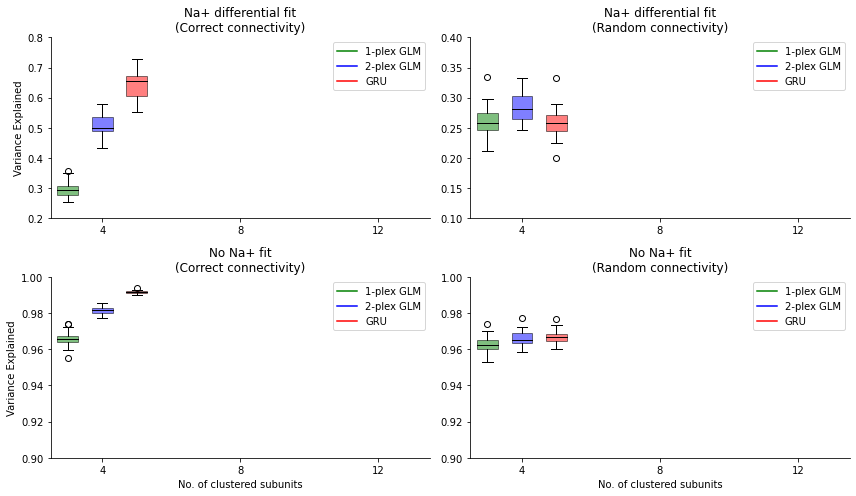

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (12,7))
colors = ["green", "blue", "red"]

for row in range(2):
    for col in range(2):
        
        if (row == 0) & (col == 0):
            array = diff_hand_var_exp
        elif (row == 0) & (col == 1):
            array = diff_rand_var_exp
        elif (row == 1) & (col == 0):
            array = nona_hand_var_exp
        elif (row == 1) & (col == 1):
            array = nona_rand_var_exp
        
        # first boxplot pair
        bp = axs[row,col].boxplot(array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
        for patch in bp["medians"]:
            patch.set_color("black")

        # second boxplot pair
        bp = axs[row,col].boxplot(array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
        for patch in bp["medians"]:
            patch.set_color("black")

        # thrid boxplot pair
        bp = axs[row,col].boxplot(array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
        for patch in bp["medians"]:
            patch.set_color("black")

        axs[row,col].set_xticks([2,6,10])
        axs[row,col].set_xticklabels(["4", "8", "12"])
        axs[row,col].margins(x=0.005, y=0.005)
        axs[row,col].spines.right.set_visible(False)
        axs[row,col].spines.top.set_visible(False)
        
        if (row == 0) & (col == 0):
            axs[row,col].set_ylim(0.2,0.8)
            axs[row,col].set_title("Na+ differential fit\n(Correct connectivity)")
            axs[row,col].set_ylabel("Variance Explained")
        elif (row == 0) & (col == 1):
            axs[row,col].set_ylim(0.1,0.4)
            axs[row,col].set_title("Na+ differential fit\n(Random connectivity)")
        elif (row == 1) & (col == 0):
            axs[row,col].set_ylim(0.9,1)
            axs[row,col].set_title("No Na+ fit\n(Correct connectivity)")
            axs[row,col].set_ylabel("Variance Explained")
            axs[row,col].set_xlabel("No. of clustered subunits")
        elif (row == 1) & (col == 1):
            axs[row,col].set_ylim(0.9,1)
            axs[row,col].set_title("No Na+ fit\n(Random connectivity)")
            axs[row,col].set_xlabel("No. of clustered subunits")

        hB, = axs[row,col].plot(1,1,'blue')
        hR, = axs[row,col].plot(1,1,'red')
        hG, = axs[row,col].plot(1,1,'green')
        axs[row,col].legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
        hB.set_visible(False)
        hR.set_visible(False)
        hG.set_visible(False)
        
fig.tight_layout()
plt.show()

## Distance scales

In [30]:
gru4_diff_hand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["E_scale"]
gru4_nona_hand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["E_scale"]

gru4_diff_rand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/random/gru_s10_h20_output.npz")["E_scale"]
gru4_nona_rand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/random/gru_s10_h20_output.npz")["E_scale"]

gru4_diff_rand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/random/gru_s10_h20_output.npz")["E_scale"]
eloc4 = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,1]
eloc4 = eloc4*(-1) + 1

bg_idx = np.arange(2000)
bg_idx = np.delete(bg_idx, np.arange(880,1120))

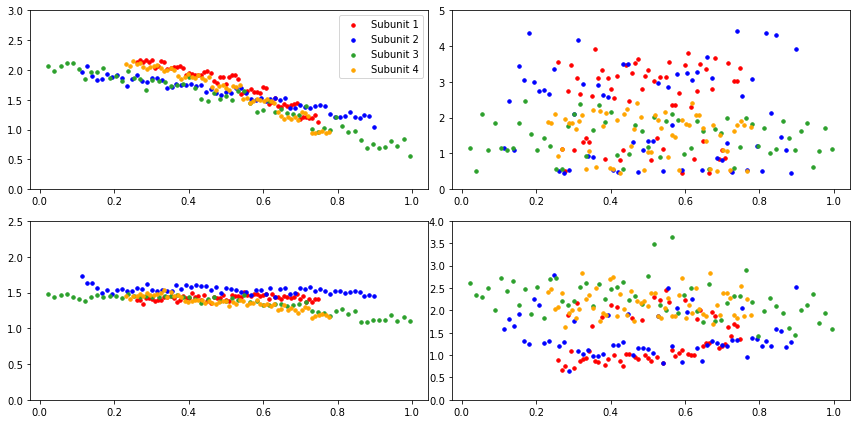

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for row in range(2):
    for col in range(2):
        if (row == 0) & (col == 0):
            array = gru4_diff_hand_scale
        elif (row == 0) & (col == 1):
            array = gru4_diff_rand_scale
        elif (row == 1) & (col == 0):
            array = gru4_nona_hand_scale
        elif (row == 1) & (col == 1):
            array = gru4_nona_rand_scale
        
        axs[row,col].scatter(eloc4[880:940], array[880:940], color="red", s=12, label="Subunit 1")
        axs[row,col].scatter(eloc4[940:1000], array[940:1000], color="blue", s=12, label="Subunit 2")
        axs[row,col].scatter(eloc4[1000:1060], array[1000:1060], color="tab:green", s=12, label="Subunit 3")
        axs[row,col].scatter(eloc4[1060:1120], array[1060:1120], color="orange", s=12, label="Subunit 4")
        
        #axs[row,col].scatter(eloc4[bg_idx], gru4_diff_hand_scale[bg_idx], color="gray", s=3)
        
        if (row == 0) & (col == 0):
            axs[row,col].set_ylim(0,3)
            axs[row,col].legend()
        elif (row == 0) & (col == 1):
            axs[row,col].set_ylim(0,5)
        elif (row == 1) & (col == 0):
            axs[row,col].set_ylim(0,2.5)
        elif (row == 1) & (col == 1):
            axs[row,col].set_ylim(0,4)
        
fig.tight_layout()
plt.show()